## Import and Setup

In [116]:
!pip install -e ../

Obtaining file:///C:/Users/AlphaDiallo/AlphaDoc/job/Total/test_asset/MLFeatureSelection
  Found existing installation: FeatureSelector 0.0.0
    Uninstalling FeatureSelector-0.0.0:
      Successfully uninstalled FeatureSelector-0.0.0
  Running setup.py develop for FeatureSelector


In [65]:
from FeatureSelection import FeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import numpy as np

In [49]:
X, y = make_classification(n_samples=1000, n_features=2,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
X.shape,y.shape

((1000, 2), (1000,))

In [50]:
def build_df(X,y, save_df=True):
    data = {}
    for col in range(X.shape[1]):
        data[f'col_{col}'] = X[:,col]
    data['y'] = y
    df = pd.DataFrame (data)
    if save_df:
        df.to_csv('test_dataset.csv', index=False)
    return df

In [51]:
df = build_df(X,y, save_df=False)
df.head()

,col_0,col_1,y
0,-1.668532,-1.299013,0
1,-2.972883,-1.088783,0
2,-0.596141,-1.370070,0
3,-1.068947,-1.175057,0
4,-1.305269,-0.965926,0


In [59]:
sns.set_style("whitegrid")
def plot(df, x,y):
    sns.FacetGrid(df, hue="y", height=4).map(plt.scatter, x, y).add_legend()
    plt.show()

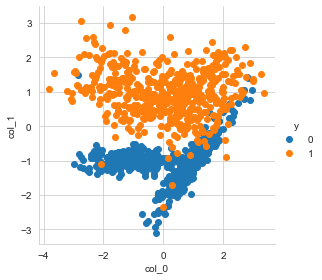

In [60]:
plot(df,'col_0', 'col_1')

## Starting test FeatureSelector with source df

In [9]:
#inherits  FeatureSelection
class testFeatureSelector(FeatureSelector):
    def __init__(self, df, target_col, log_level=logging.INFO):
        FeatureSelector.__init__(self, df, target_col, log_level=logging.INFO)
        
    def build_model(self):
        """
        Define your model here and return a model instance that implements "fit" method
        """
        clf = RandomForestClassifier(max_depth=2, random_state=0)
        return clf


In [53]:
%%time
f = testFeatureSelector(df=df, target_col='y', log_level=logging.INFO)
list_kept_features = f.featureSelectionCV(small_is_better=False, scoring_metric='f1', cv=5)


ERROR:root:The type of model used <class 'sklearn.ensemble._forest.RandomForestClassifier'> is not supported for fast_version, the classic version will be re-activated.
[I 201030 13:02:58 __init__:145] Starting score 0.9467633467252557


Wall time: 4.4 s


In [54]:
list_kept_features

Index(['col_0', 'col_1'], dtype='object')

## Let duplicate one col and see the FeatureSelector result

In [55]:
df['col_2'] = df['col_0']
df.head()

,col_0,col_1,y,col_2
0,-1.668532,-1.299013,0,-1.668532
1,-2.972883,-1.088783,0,-2.972883
2,-0.596141,-1.370070,0,-0.596141
3,-1.068947,-1.175057,0,-1.068947
4,-1.305269,-0.965926,0,-1.305269


In [62]:
%%time
f = testFeatureSelector(df=df, target_col='y', log_level=logging.INFO)
list_kept_features = f.featureSelectionCV(small_is_better=False, scoring_metric='f1', cv=5)


ERROR:root:The type of model used <class 'sklearn.ensemble._forest.RandomForestClassifier'> is not supported for fast_version, the classic version will be re-activated.
[I 201030 13:07:41 __init__:145] Starting score 0.9481231099372197
[I 201030 13:07:43 __init__:167] New base line score: 0.9481231099372197


Wall time: 6.47 s


In [63]:
list_kept_features

Index(['col_1', 'col_2'], dtype='object')

<b> we can see that col_0 has been removed bacause col_0==col_2 </b>

## Let add cols with random values and see the FeatureSelector result

In [110]:
np.random.seed(1234)
df['col_2'] = np.random.uniform(-3, 3, df.shape[0])
np.random.seed(1233)
df['col_3'] = np.random.uniform(-3, 3, df.shape[0])
display(df.head())
print(df.shape)

,col_0,col_1,y,col_2,col_3
0,-1.668532,-1.299013,0,-1.850883,1.718625
1,-2.972883,-1.088783,0,0.732653,0.936858
2,-0.596141,-1.370070,0,-0.373634,2.573068
3,-1.068947,-1.175057,0,1.712152,2.174683
4,-1.305269,-0.965926,0,1.679855,1.189683


(1000, 5)


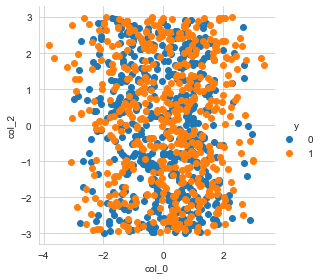

In [111]:
plot(df,'col_0', 'col_2')

In [112]:
%%time
f = testFeatureSelector(df=df, target_col='y', log_level=logging.INFO)
list_kept_features = f.featureSelectionCV(small_is_better=False, scoring_metric='f1', cv=5)


ERROR:root:The type of model used <class 'sklearn.ensemble._forest.RandomForestClassifier'> is not supported for fast_version, the classic version will be re-activated.
[I 201030 13:27:20 __init__:145] Starting score 0.9467378533174093
[I 201030 13:27:25 __init__:167] New base line score: 0.9467633467252557
[I 201030 13:27:28 __init__:167] New base line score: 0.9467633467252557


Wall time: 9.21 s


In [113]:
list_kept_features

Index(['col_0', 'col_1'], dtype='object')

<b> we can see that the random values has been deleted </b>